In [1]:
import pandas as pd
from pandas import DataFrame, Series
import os, json, csv
import requests
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

In [2]:
matplotlib.rcParams["font.size"] = 16

In [3]:
df=pd.read_csv("ProcessedData.csv")

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1=pd.read_csv("Suburb.csv")

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)
conn1 = sqlite3.connect('df1.db')
df1.to_sql("df1", conn1, if_exists="replace", index=False)

In [6]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

def qry(sql,a):
    return pd.read_sql(sql,a)

In [7]:
MUnder21=qry("""
SELECT count(WEEK)
FROM df
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)""",conn)

SUnder21=qry("""
SELECT count(WEEK)
FROM df1
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)""",conn1)

M21and25=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)""",conn)

S21and25=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)""",conn1)

M25and35=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)""",conn)

S25and35=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)""",conn1)

M35and45=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)""",conn)

S35and45=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)""",conn1)

M45and55=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)""",conn)

S45and55=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)""",conn1)

M55and65=qry("""
SELECT count(WEEK)
FROM df
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)""",conn)

S55and65=qry("""
SELECT count(WEEK)
FROM df1
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)""",conn1)

M65=qry("""
SELECT count(WEEK)
FROM df
WHERE (AGE1>65) or (AGE2>65)""",conn)

S65=qry("""
SELECT count(WEEK)
FROM df1
WHERE (AGE1>65) or (AGE2>65)""",conn1)

SumM=MUnder21["count(WEEK)"][0]+M21and25["count(WEEK)"][0]+M25and35["count(WEEK)"][0]+M35and45["count(WEEK)"][0]+M45and55["count(WEEK)"][0]+M55and65["count(WEEK)"][0]+M65["count(WEEK)"][0]
ageM=Series({"0-25":((MUnder21["count(WEEK)"][0]+M21and25["count(WEEK)"][0])/SumM)*100,"25-35":(M25and35["count(WEEK)"][0]/SumM)*100,"35-45":(M35and45["count(WEEK)"][0]/SumM)*100,"45-55":(M45and55["count(WEEK)"][0]/SumM)*100,"55-65":(M55and65["count(WEEK)"][0]/SumM)*100,">65":(M65["count(WEEK)"][0]/SumM)*100})

SumS=SUnder21["count(WEEK)"][0]+S21and25["count(WEEK)"][0]+S25and35["count(WEEK)"][0]+S35and45["count(WEEK)"][0]+S45and55["count(WEEK)"][0]+S55and65["count(WEEK)"][0]+S65["count(WEEK)"][0]
ageS=Series({"0-25":((SUnder21["count(WEEK)"][0]+S21and25["count(WEEK)"][0])/SumS)*100,"25-35":(S25and35["count(WEEK)"][0]/SumS)*100,"35-45":(S35and45["count(WEEK)"][0]/SumS)*100,"45-55":(S45and55["count(WEEK)"][0]/SumS)*100,"55-65":(S55and65["count(WEEK)"][0]/SumS)*100,">65":(S65["count(WEEK)"][0]/SumS)*100})

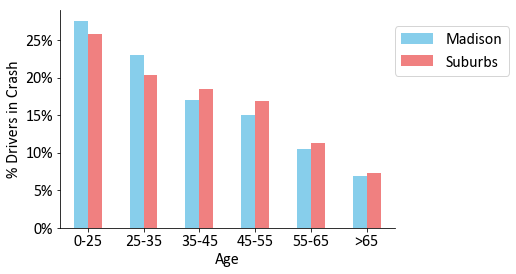

In [8]:
CONC= pd.concat([ageM,ageS], axis=1)
CONC.columns= ['Madison', 'Suburbs']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Age")
ax.set_ylabel("% Drivers in Crash")
#ax.set_title("Age Distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('Age.eps', dpi=100,bbox_inches="tight")

In [9]:
MUnder21=qry("""
SELECT count(WEEK) as "0-21"
FROM df
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)
GROUP BY YEAR
limit 19""",conn)

SUnder21=qry("""
SELECT count(WEEK) as"0-21"
FROM df1
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)
GROUP BY YEAR
limit 19""",conn1)

M21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)
GROUP BY YEAR
limit 19""",conn)

S21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df1
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)
GROUP BY YEAR
limit 19""",conn1)

M25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)
GROUP BY YEAR
limit 19""",conn)

S25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df1
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)
GROUP BY YEAR
limit 19""",conn1)

M35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)
GROUP BY YEAR
limit 19""",conn)

S35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df1
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)
GROUP BY YEAR
limit 19""",conn1)

M45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)
GROUP BY YEAR
limit 19""",conn)

S45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df1
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)
GROUP BY YEAR
limit 19""",conn1)

M55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)
GROUP BY YEAR
limit 19""",conn)

S55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df1
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)
GROUP BY YEAR
limit 19""",conn1)

M65=qry("""
SELECT count(WEEK) as ">65"
FROM df
WHERE (AGE1>65) or (AGE2>65)
GROUP BY YEAR
limit 19""",conn)

S65=qry("""
SELECT count(WEEK) as ">65"
FROM df1
WHERE (AGE1>65) or (AGE2>65)
GROUP BY YEAR
limit 19""",conn1)

m=pd.concat([MUnder21,M21and25,M25and35,M35and45,M45and55,M55and65,M65],axis=1)
m.index=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
N=["0-21","21-25","25-35","35-45","45-55","55-65",">65"]
S=m.sum(axis=1)

for i in N:
    m[i]=(m[i]/S)*100

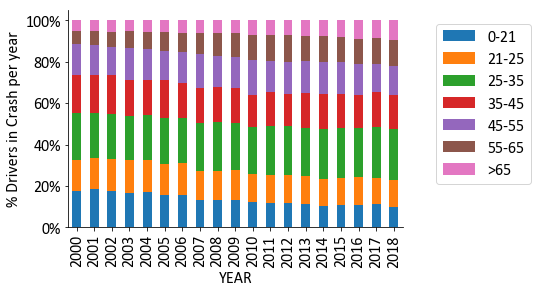

In [10]:
ax=m.plot.bar(rot=90,stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("YEAR")
ax.set_ylabel("% Drivers in Crash per year")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
ax.legend(loc=[1.1, 0.2])

fig = matplotlib.pyplot.gcf()
fig.savefig('YEARANDAGE.png', dpi=100,bbox_inches="tight")

In [11]:
MUnder21=qry("""
SELECT count(WEEK) as "0-21"
FROM df
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)
GROUP BY MONTH
""",conn)

SUnder21=qry("""
SELECT count(WEEK) as"0-21"
FROM df1
WHERE (AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0)
GROUP BY MONTH
""",conn1)

M21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)
GROUP BY MONTH
""",conn)

S21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df1
WHERE ((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25)
GROUP BY MONTH
""",conn1)

M25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)
GROUP BY MONTH
""",conn)

S25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df1
WHERE ((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35)
GROUP BY MONTH
""",conn1)

M35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)
GROUP BY MONTH
""",conn)

S35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df1
WHERE ((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45)
GROUP BY MONTH
""",conn1)

M45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)
GROUP BY MONTH
""",conn)

S45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df1
WHERE ((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55)
GROUP BY MONTH
""",conn1)

M55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)
GROUP BY MONTH
""",conn)

S55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df1
WHERE ((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65)
GROUP BY MONTH
""",conn1)

M65=qry("""
SELECT count(WEEK) as ">65"
FROM df
WHERE (AGE1>65) or (AGE2>65)
GROUP BY MONTH
""",conn)

S65=qry("""
SELECT count(WEEK) as ">65"
FROM df1
WHERE (AGE1>65) or (AGE2>65)
GROUP BY MONTH
""",conn1)

m1=pd.concat([MUnder21,M21and25,M25and35,M35and45,M45and55,M55and65,M65],axis=1)
m1.index=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
N=["0-21","21-25","25-35","35-45","45-55","55-65",">65"]
S=m1.sum(axis=1)

for i in N:
    m1[i]=(m1[i]/S)*100

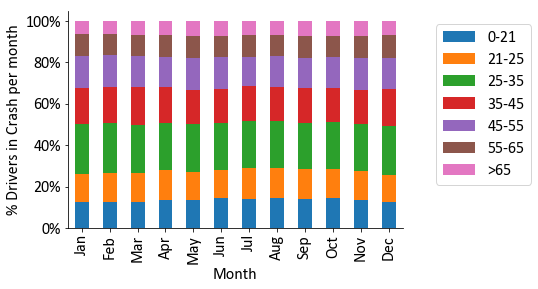

In [12]:
ax=m1.plot.bar(rot=90,stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Month")
ax.set_ylabel("% Drivers in Crash per month")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
ax.legend(loc=[1.1, 0.2])

fig = matplotlib.pyplot.gcf()
fig.savefig('MONTHANDAGE.png', dpi=100,bbox_inches="tight")

In [13]:
MUnder21=qry("""
SELECT count(WEEK) as "0-21"
FROM df
WHERE (AGE1<21 and AGE1>0) 
GROUP BY NTFYHOUR limit 24
""",conn)

SUnder21=qry("""
SELECT count(WEEK) as"0-21"
FROM df1
WHERE (AGE1<21 and AGE1>0) 
GROUP BY NTFYHOUR limit 24
""",conn1)

M21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df
WHERE (AGE1>21 or AGE1=21) and AGE1<25 
GROUP BY NTFYHOUR limit 24
""",conn)

S21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df1
WHERE (AGE1>21 or AGE1=21) and AGE1<25 
GROUP BY NTFYHOUR limit 24
""",conn1)

M25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df
WHERE (AGE1>25 or AGE1=25) and AGE1<35 
GROUP BY NTFYHOUR limit 24
""",conn)

S25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df1
WHERE (AGE1>25 or AGE1=25) and AGE1<35
GROUP BY NTFYHOUR limit 24
""",conn1)

M35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df
WHERE (AGE1>35 or AGE1=35) and AGE1<45
GROUP BY NTFYHOUR limit 24
""",conn)

S35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df1
WHERE (AGE1>35 or AGE1=35) and AGE1<45
GROUP BY NTFYHOUR limit 24
""",conn1)

M45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df
WHERE (AGE1>45 or AGE1=45) and AGE1<55 
GROUP BY NTFYHOUR limit 24
""",conn)

S45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df1
WHERE (AGE1>45 or AGE1=45) and AGE1<55 
GROUP BY NTFYHOUR limit 24
""",conn1)

M55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df
WHERE (AGE1>55 or AGE1=55) and AGE1<65
GROUP BY NTFYHOUR limit 24
""",conn)

S55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df1
WHERE (AGE1>55 or AGE1=55) and AGE1<65
GROUP BY NTFYHOUR limit 24
""",conn1)

M65=qry("""
SELECT count(WEEK) as ">65"
FROM df
WHERE (AGE1>65) 
GROUP BY NTFYHOUR limit 24
""",conn)

S65=qry("""
SELECT count(WEEK) as ">65"
FROM df1
WHERE (AGE1>65) 
GROUP BY NTFYHOUR limit 24
""",conn1)

m2=pd.concat([MUnder21,M21and25,M25and35,M35and45,M45and55,M55and65,M65],axis=1)
m2.index=["12am", "1 am", "2 am", "3 am", "4 am", "5 am","6 am","7 am","8 am","9 am","10am","11am","12pm","1 pm","2 pm","3 pm","4 pm","5 pm","6 pm","7 pm","8 pm","9 pm","10pm","11pm"]
N=["0-21","21-25","25-35","35-45","45-55","55-65",">65"]
S=m2.sum(axis=1)

for i in N:
    m2[i]=(m2[i]/S)*100

d:\搜狗高速下载\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


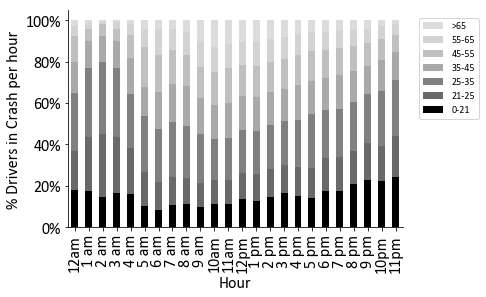

In [14]:
#color=["Indianred","cornflowerblue","hotpink","orange","plum","greenyellow","lightsalmon"]
color1=["black","dimgrey","grey","darkgrey","silver","lightgrey","gainsboro"]
ax=m2.plot.bar(colors=color1,rot=90,stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Hour")
ax.set_ylabel("% Drivers in Crash per hour")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=[1.05, 0.5],fontsize=10)

fig = matplotlib.pyplot.gcf()
fig.savefig('AgeM.eps', dpi=100,bbox_inches="tight")

In [15]:
MUnder21=qry("""
SELECT count(WEEK) as "0-21"
FROM df
WHERE ALCFLAG="Y" and ((AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0))
""",conn)

SUnder21=qry("""
SELECT count(WEEK) as"0-21"
FROM df1
WHERE ALCFLAG="Y" and ((AGE1<21 and AGE1>0) or (AGE2<21 and AGE2>0))
""",conn1)

M21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df
WHERE ALCFLAG="Y" and (((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25))
""",conn)

S21and25=qry("""
SELECT count(WEEK) as "21-25"
FROM df1
WHERE ALCFLAG="Y" and (((AGE1>21 or AGE1=21) and AGE1<25) or ((AGE2>21 or AGE2=21) and AGE2<25))
""",conn1)

M25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df
WHERE ALCFLAG="Y" and (((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35))
""",conn)

S25and35=qry("""
SELECT count(WEEK) as "25-35"
FROM df1
WHERE ALCFLAG="Y" and (((AGE1>25 or AGE1=25) and AGE1<35) or ((AGE2>25 or AGE2=25) and AGE2<35))
""",conn1)

M35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df
WHERE ALCFLAG="Y" and (((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45))
""",conn)

S35and45=qry("""
SELECT count(WEEK) as "35-45"
FROM df1
WHERE ALCFLAG="Y" and (((AGE1>35 or AGE1=35) and AGE1<45) or ((AGE2>35 or AGE2=35) and AGE2<45))
""",conn1)

M45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df
WHERE ALCFLAG="Y" and (((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55))
""",conn)

S45and55=qry("""
SELECT count(WEEK) as "45-55"
FROM df1
WHERE ALCFLAG="Y" and (((AGE1>45 or AGE1=45) and AGE1<55) or ((AGE2>45 or AGE2=45) and AGE2<55))
""",conn1)

M55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df
WHERE ALCFLAG="Y" and (((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65))
""",conn)

S55and65=qry("""
SELECT count(WEEK) as "55-65"
FROM df1
WHERE ALCFLAG="Y" and (((AGE1>55 or AGE1=55) and AGE1<65) or ((AGE2>55 or AGE2=55) and AGE2<65))
""",conn1)

M65=qry("""
SELECT count(WEEK) as ">65"
FROM df
WHERE ALCFLAG="Y" and ((AGE1>65) or (AGE2>65))
""",conn)

S65=qry("""
SELECT count(WEEK) as ">65"
FROM df1
WHERE ALCFLAG="Y" and ((AGE1>65) or (AGE2>65))
""",conn1)

m2=Series({"0-21":MUnder21["0-21"][0],"21-25":M21and25["21-25"][0] ,"25-35":M25and35["25-35"][0],"35-45":M35and45["35-45"][0],"45-55":M45and55["45-55"][0],"55-65":M55and65["55-65"][0]," >65":M65[">65"][0]})

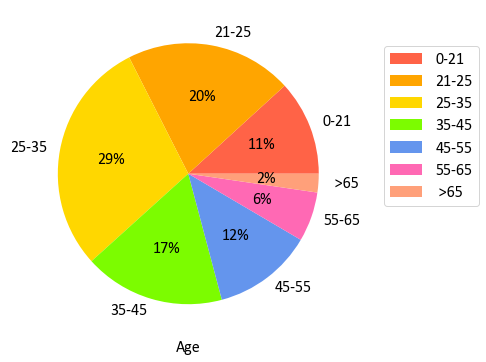

In [16]:
color=["tomato","orange","gold","lawngreen","cornflowerblue","hotpink","lightsalmon"]
ax=m2.plot.pie(colors=color, autopct="%d%%",figsize=(6,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("Age")
ax.set_ylabel("none",color="white")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(5, 21, 5)
ax.legend(loc=[1.1, 0.4])

fig = matplotlib.pyplot.gcf()
fig.savefig('AAgeM.eps', dpi=100,bbox_inches="tight")

In [73]:
CONC= pd.concat([PageMA,PageSA], axis=1)
CONC.columns= ['Madison', 'Suburbs']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Age")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title("Alcohol-Related Age distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('AAge.eps', dpi=100,bbox_inches="tight")

NameError: name 'PageMA' is not defined

In [18]:
CONC= pd.concat([PageMA], axis=1)
CONC.columns= ['Madison']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Age")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title("Alcohol-Related Age distribution of Drivers in Crashes")

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.legend(loc=[1, 0.7])

fig = matplotlib.pyplot.gcf()
fig.savefig('AAgeM.eps', dpi=100,bbox_inches="tight")

NameError: name 'PageMA' is not defined

In [19]:
MF=qry("""
SELECT count(WEEK)
FROM df
WHERE (SEX1 ="F") or (SEX2="F")""",conn)

SF=qry("""
SELECT count(WEEK)
FROM df1
WHERE (SEX1 ="F") or (SEX2="F")""",conn1)

MM=qry("""
SELECT count(WEEK)
FROM df
WHERE (SEX1 ="M") or (SEX2="F")""",conn)

SM=qry("""
SELECT count(WEEK)
FROM df1
WHERE (SEX1 ="M") or (SEX2="M")""",conn1)

sumM=MM["count(WEEK)"][0]+MF["count(WEEK)"][0]
sumS=SM["count(WEEK)"][0]+SF["count(WEEK)"][0]
GM=Series({"Madison":round((MM["count(WEEK)"][0]/sumM)*100),"Suburb":round((SM["count(WEEK)"][0]/sumS)*100)})
GF=Series({"Madison":round((MF["count(WEEK)"][0]/sumM)*100),"Suburb":round((SF["count(WEEK)"][0]/sumS)*100)})

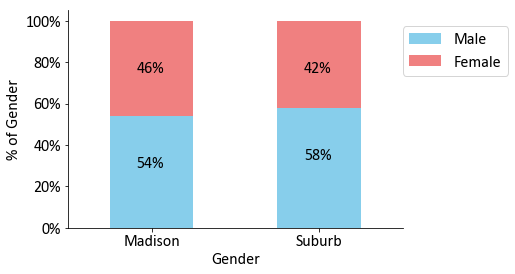

In [20]:
CONC= pd.concat([GM,GF], axis=1)
CONC.columns= ['Male', 'Female']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0,stacked=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gender")
ax.set_ylabel("% of Gender")
#ax.set_title("Gender Distribution of Drivers in Crashes")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x+0.16, y + height - 25))

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 101, 20)
plt.yticks(my_y_ticks)

ax.legend(loc=[1, 0.7])
fig = matplotlib.pyplot.gcf()
fig.savefig('ge1.eps', dpi=100,bbox_inches="tight")

In [21]:
AMF=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="F") or (SEX2="F"))""",conn)

ASF=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and ((SEX1 ="F") or (SEX2="F"))""",conn1)

AMM=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="M") or (SEX2="F"))""",conn)

ASM=qry("""
SELECT count(WEEK)
FROM df1
WHERE ALCFLAG == "Y" and ((SEX1 ="M") or (SEX2="M"))""",conn1)

AsumM=AMM["count(WEEK)"][0]+AMF["count(WEEK)"][0]
AsumS=ASM["count(WEEK)"][0]+ASF["count(WEEK)"][0]
M=Series({"Madison":(AMM["count(WEEK)"][0]/AsumM)*100,"Suburb":(ASM["count(WEEK)"][0]/AsumS)*100})
F=Series({"Madison":(AMF["count(WEEK)"][0]/AsumM)*100,"Suburb":(ASF["count(WEEK)"][0]/AsumS)*100})

In [22]:
AMF=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="F"))
GROUP BY YEAR
""" ,conn)

AMM=qry("""
SELECT count(WEEK)
FROM df
WHERE ALCFLAG == "Y" and ((SEX1 ="M"))
GROUP BY YEAR
""",conn)

MF=qry("""
SELECT count(WEEK)
FROM df
WHERE ((SEX1 ="F"))
GROUP BY YEAR
""" ,conn)

MM=qry("""
SELECT count(WEEK)
FROM df
WHERE ((SEX1 ="M"))
GROUP BY YEAR
""",conn)
#for i in range(19):
    #S=AMF["count(WEEK)"][i]+AMM["count(WEEK)"][i]
    #AMF["count(WEEK)"][i]=(AMF["count(WEEK)"][i]/S).round(2)*100    
    #AMM["count(WEEK)"][i]=(AMM["count(WEEK)"][i]/S).round(2)*100

#m5=pd.concat([AMM[:19],AMF[:19]],axis=1)
#m5.columns=["Male","Female"]
#m5.index=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'2016',"2017","2018"]

In [23]:
m5=pd.concat([MM[:19],MF[:19],AMM[:19],AMF[:19]],axis=1)
m5.columns=["Male Total","Female Total","Male Alcohol","Female Alcohol"]
m5.index=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'2016',"2017","2018"]

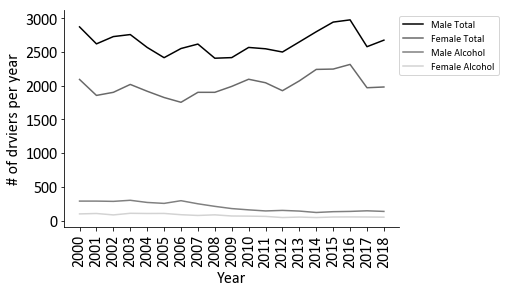

In [47]:
ax=m5.plot.line(color=["black","dimgrey","grey","lightgrey"],rot=90)
plt.xticks(np.arange(19),("2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'2016',"2017","2018"))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Year")
ax.set_ylabel("# of drviers per year")
    
my_y_ticks = np.arange(0, 3300, 500)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.7],fontsize=10)
fig = matplotlib.pyplot.gcf()
fig.savefig('Gender.eps', dpi=100,bbox_inches="tight")

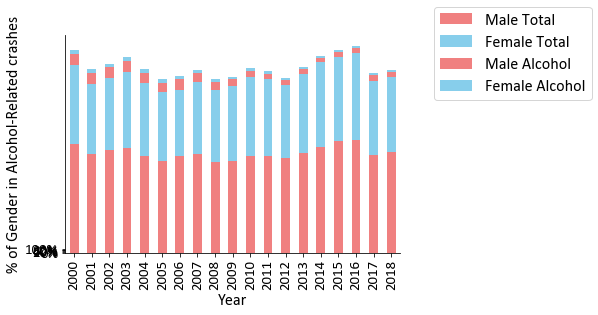

In [25]:
ax=m5.plot.bar(color=["lightcoral","skyblue"],rot=90,stacked=True,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Year")
ax.set_ylabel("% of Gender in Alcohol-Related crashes")
    
fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 101, 20)
plt.yticks(my_y_ticks)

ax.legend(loc=[1.1, 0.7])
fig = matplotlib.pyplot.gcf()
fig.savefig('Gender.eps', dpi=100,bbox_inches="tight")

In [26]:
AMF=qry("""
SELECT count(WEEK)
FROM df
WHERE ((SEX1 ="F") or (SEX2="F"))
GROUP BY YEAR
""" ,conn)

AMM=qry("""
SELECT count(WEEK)
FROM df
WHERE ((SEX1 ="M") or (SEX2="M"))
GROUP BY YEAR
""",conn)


for i in range(19):
    S=AMF["count(WEEK)"][i]+AMM["count(WEEK)"][i]
    AMF["count(WEEK)"][i]=(AMF["count(WEEK)"][i]/S).round(2)*100    
    AMM["count(WEEK)"][i]=(AMM["count(WEEK)"][i]/S).round(2)*100

m6=pd.concat([AMM[:19],AMF[:19]],axis=1)
m6.columns=["Male","Female"]
m6.index=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015",'2016',"2017","2018"]

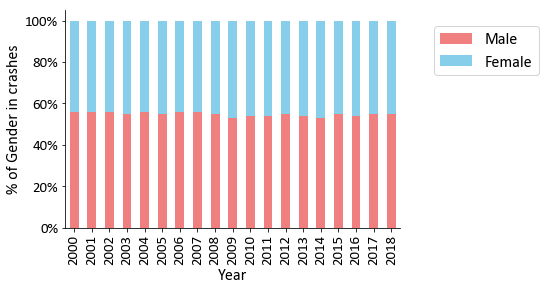

In [27]:
ax=m6.plot.bar(color=["lightcoral","skyblue"],rot=90,stacked=True,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Year")
ax.set_ylabel("% of Gender in crashes")
    
fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 101, 20)
plt.yticks(my_y_ticks)

ax.legend(loc=[1.1, 0.7])
fig = matplotlib.pyplot.gcf()
fig.savefig('GE.eps', dpi=100,bbox_inches="tight")

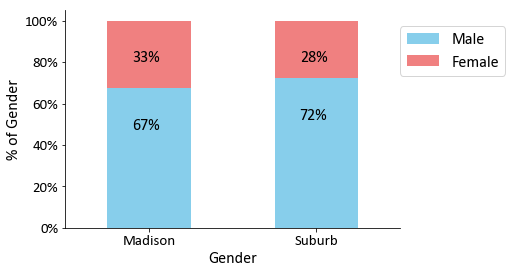

In [28]:
CONC= pd.concat([M,F], axis=1)
CONC.columns= ['Male', 'Female']
colors=["skyblue","lightcoral"]
ax=CONC.plot.bar(color=colors,rot=0,stacked=True,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Gender")
ax.set_ylabel("% of Gender")
#ax.set_title("Gender Distribution of Drivers in Alcohol-Related Crashes")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x+0.15, y + height - 20))

    
fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 101, 20)
plt.yticks(my_y_ticks)

ax.legend(loc=[1, 0.7])
fig = matplotlib.pyplot.gcf()
fig.savefig('gender1.eps', dpi=100,bbox_inches="tight")

In [29]:
YM=qry("""
SELECT count(YEAR)
FROM df
GROUP BY YEAR limit 19
""",conn)

YS=qry("""
SELECT count(YEAR)
FROM df1
GROUP BY YEAR limit 19
""" ,conn1)

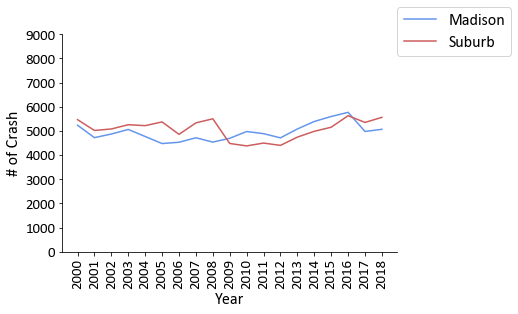

In [30]:
CONC= pd.concat([YM,YS], axis=1)
CONC.columns= ['Madison', 'Suburb']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title("Crash Distribution by Year")

my_y_ticks = np.arange(0, 9001, 1000)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('Yearcrash.eps', dpi=100,bbox_inches="tight")

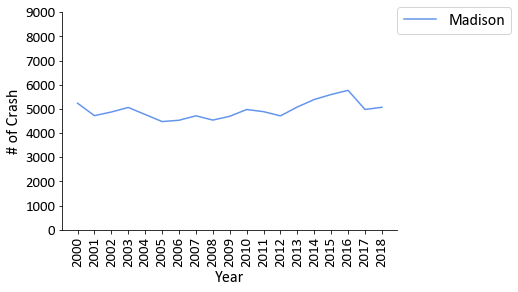

In [31]:
CONC= pd.concat([YM], axis=1)
CONC.columns= ['Madison']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title("Crash Distribution by Year")

my_y_ticks = np.arange(0, 9001, 1000)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('YearcrashM.eps', dpi=100,bbox_inches="tight")

In [32]:
YMA=qry("""
SELECT count(YEAR)
FROM df
WHERE ALCFLAG == "Y"
GROUP BY YEAR limit 19
""",conn)

YSA=qry("""
SELECT count(YEAR)
FROM df1
WHERE ALCFLAG == "Y"
GROUP BY YEAR limit 19
""",conn1)

In [33]:
YMADAY=qry("""
SELECT count(YEAR)
FROM df
WHERE ALCFLAG == "Y" and (NTFYHOUR >=6 and NTFYHOUR <20)
GROUP BY YEAR limit 19
""",conn)

YMANIGHT=qry("""
SELECT count(YEAR)
FROM df
WHERE ALCFLAG == "Y" and (NTFYHOUR <6 or NTFYHOUR >=20)
GROUP BY YEAR limit 19
""",conn)

print(YMANIGHT)

    count(YEAR)
0           309
1           297
2           278
3           304
4           280
5           289
6           290
7           251
8           227
9           178
10          158
11          157
12          145
13          123
14          123
15          121
16          134
17          135
18          135


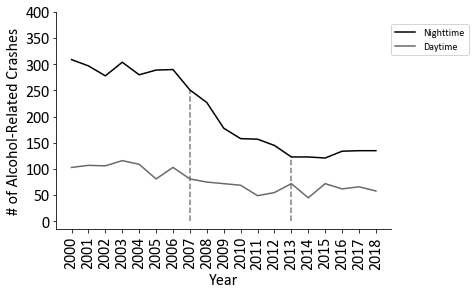

In [53]:
CONC= pd.concat([YMANIGHT,YMADAY], axis=1)
CONC.columns= ['Nighttime','Daytime']
ax=CONC.plot(color=["black","dimgrey"],stacked=False,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Alcohol-Related Crashes")
plt.vlines(7,0,251, linestyles = "dashed",color="grey")
plt.vlines(13,0,123, linestyles = "dashed",color="grey")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0, 401, 50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.8],fontsize=10)

fig = matplotlib.pyplot.gcf()
fig.savefig('AYearcrashM.eps', dpi=100,bbox_inches="tight")

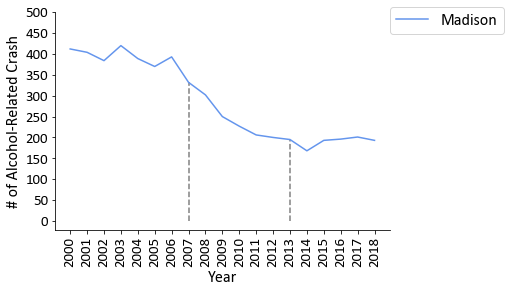

In [35]:
CONC= pd.concat([YMA], axis=1)
CONC.columns= ['Madison']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Alcohol-Related Crash")
plt.vlines(7,0,332, linestyles = "dashed",color="grey")
plt.vlines(13,0,195, linestyles = "dashed",color="grey")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0, 501, 50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('AYearcrash.eps', dpi=100,bbox_inches="tight")

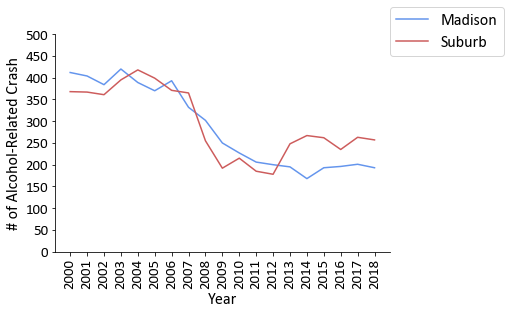

In [36]:
CONC= pd.concat([YMA,YSA], axis=1)
CONC.columns= ['Madison', 'Suburb']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("# of Alcohol-Related Crash")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

my_y_ticks = np.arange(0, 501, 50)
plt.yticks(my_y_ticks)
ax.legend(loc=[1,0.9])

fig = matplotlib.pyplot.gcf()
fig.savefig('AYearcrash.eps', dpi=100,bbox_inches="tight")

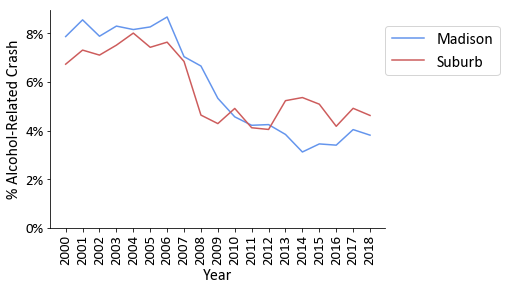

In [37]:
CONC= pd.concat([(YMA/YM)*100,(YSA/YS)*100], axis=1)
CONC.columns= ['Madison', 'Suburb']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot.line(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title(" Alcohol-Related Crash Distribution by Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 9, 2)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.7])
ax.get_figure().savefig("YearcrashA.eps", bbox_inches="tight")

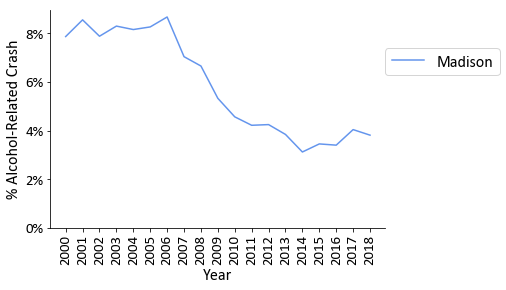

In [38]:
CONC= pd.concat([(YMA/YM)*100], axis=1)
CONC.columns= ['Madison']
colors=["cornflowerblue","Indianred"]
ax=CONC.plot.line(color=colors,stacked=False,fontsize=15,rot=90)

ax = plt.gca()
plt.xticks(np.arange(19), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'))
ax.set_xlabel("Year")
ax.set_ylabel("% Alcohol-Related Crash")
#ax.set_title(" Alcohol-Related Crash Distribution by Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0, 9, 2)
plt.yticks(my_y_ticks)

ax.legend(loc=[1,0.7])
ax.get_figure().savefig("YearcrashAM.eps", bbox_inches="tight")

In [39]:
INJ_FAT_ACCDTYPE = qry ("""
SELECT ACCDTYPE, count(Month) as "Sum", sum(TOTFATL) as "Fatality",0 as "ratio"
FROM df1 
GROUP BY ACCDTYPE
ORDER BY Fatality DESC
""",conn1)

for i in range(len(INJ_FAT_ACCDTYPE)):
    INJ_FAT_ACCDTYPE["ratio"][i]=(INJ_FAT_ACCDTYPE["Fatality"][i]/INJ_FAT_ACCDTYPE["Sum"][i])*10000

TYPE=Series({"Pedestrian":5.8,"Bridge parapet":2.8,"Culvert":2.2,"Embankment":1.9,"Overturned vehicle":1.6,"Other object fixed":1.5,"Tree":1.3,"Ditch":1.1,"Bike":0.9," Guardrail end":0.9})

d:\搜狗高速下载\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


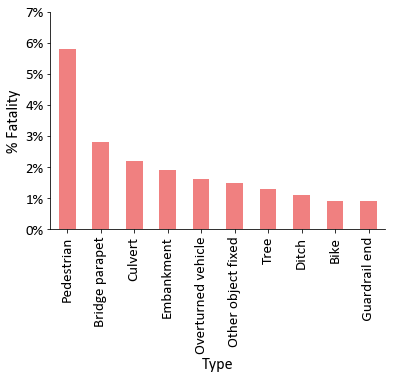

In [40]:
colors=["lightcoral"]
ax=TYPE.plot.bar(color=colors,fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Type")
ax.set_ylabel("% Fatality")
#ax.set_title("% Fatality Distributed by Type in Suburbs")

fmt='%.00f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
my_y_ticks = np.arange(0,8,1)
plt.yticks(my_y_ticks)

fig = matplotlib.pyplot.gcf()
fig.savefig('TYPEFS.eps', dpi=100,bbox_inches="tight")